In [ ]:
#!pip install opencv-contrib-python

import cv2
import os.path

## Learn to open a video

Took 1.5 hours to get VideoCapture working

In [ ]:
test = {'gucci': True}

filename1 = "/content/FullSizeRender.mov"
filename2 = 'draw.mov'

test['file1 exists'] = os.path.isfile(filename1)
test['file2 exists'] = os.path.isfile(filename2)

cap1 = cv2.VideoCapture(filename1)
cap2 = cv2.VideoCapture(filename2)

test['cap1'] = cap1

test['cap1 open'] = cap1.isOpened()
test['cap2 open'] = cap2.isOpened()

test['cap1 read'] = cap1.read()
test['cap2 read'] = cap2.read()

#test1, frame1 = cap1.read()
#test2, frame2 = cap2.read()

test

{'cap1': <VideoCapture 0x7f42e7f98290>,
 'cap1 open': False,
 'cap1 read': (False, None),
 'cap2 open': True,
 'cap2 read': (True, array([[[164, 169, 182],
          [164, 169, 182],
          [164, 169, 182],
          ...,
          [227, 231, 233],
          [227, 231, 233],
          [227, 231, 233]],
  
         [[165, 170, 183],
          [165, 170, 183],
          [165, 170, 183],
          ...,
          [227, 231, 233],
          [227, 231, 233],
          [227, 231, 233]],
  
         [[166, 171, 184],
          [166, 171, 184],
          [166, 171, 184],
          ...,
          [227, 231, 233],
          [227, 231, 233],
          [227, 231, 233]],
  
         ...,
  
         [[ 88, 102, 134],
          [ 88, 102, 134],
          [ 87, 101, 133],
          ...,
          [234, 236, 238],
          [231, 236, 236],
          [230, 235, 235]],
  
         [[ 87, 100, 135],
          [ 87, 100, 135],
          [ 88, 101, 136],
          ...,
          [227, 228, 233],
       

In [ ]:
!ffprobe -show_streams "FullSizeRender.mov"

ffprobe version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2007-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --en

In [ ]:
!ffmpeg -codecs #| grep -i avc

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [ ]:
print(cv2.getBuildInformation())


General configuration for OpenCV 4.1.2 =====================================
  Version control:               4.1.2

  Extra modules:
    Location (extra):            /io/opencv_contrib/modules
    Version control (extra):     4.1.2

  Platform:
    Timestamp:                   2019-11-22T00:43:29Z
    Host:                        Linux 4.15.0-1028-gcp x86_64
    CMake:                       3.9.0
    CMake generator:             Unix Makefiles
    CMake build tool:            /usr/bin/gmake
    Configuration:               Release

  CPU/HW features:
    Baseline:                    SSE SSE2 SSE3
      requested:                 SSE3
    Dispatched code generation:  SSE4_1 SSE4_2 FP16 AVX
      requested:                 SSE4_1 SSE4_2 AVX FP16 AVX2 AVX512_SKX
      SSE4_1 (14 files):         + SSSE3 SSE4_1
      SSE4_2 (1 files):          + SSSE3 SSE4_1 POPCNT SSE4_2
      FP16 (0 files):            + SSSE3 SSE4_1 POPCNT SSE4_2 FP16 AVX
      AVX (4 files):             + SSSE3 SSE4_1

# Learn to modify, play, and save a video

Took 2 hours to learn to modify, play and save

Goddamn OpenCV failing silently! Was this written by Satan the Devil?

In [ ]:
from google.colab.patches import cv2_imshow

filename = 'draw.mov'

# input video
cap = cv2.VideoCapture(filename)
print("did VideoCapture work? " + str(cap.isOpened()))

# get properties to match for output
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(str(width) + 'x' + str(height) + ' pixels, ' + str(fps) + ' fps, ' + str(frame_count) + ' total frames')

# output video
out = cv2.VideoWriter('output-MJPG.avi',
                      cv2.VideoWriter_fourcc(*'MJPG'),
                      fps,
                      (width, height))

counter = 0
while cap.isOpened():
  ret, frame = cap.read()
  if ret == True:
    if counter == 0:
      #print(frame)
      print(frame.shape)
    counter += 1
    # check if it's alive
    if counter % 30 == 0:
      print('frame ' + str(counter) + ' of ' + str(frame_count))
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #         vvvvv should read <gray>, but use <frame> for testing
    if counter == 200:
      print(gray.shape)
    out.write(frame)
    #if counter == 200:
      #cv2_imshow(gray)
    # show video as a sequence of frames---weighs it down, so only for testing
    #cv2_imshow(gray)
  else:
    break

cap.release()
out.release()

did VideoCapture work? True
908x820 pixels, 30.01916116670215 fps, 470 total frames
(820, 908, 3)
frame 30 of 470
frame 60 of 470
frame 90 of 470
frame 120 of 470
frame 150 of 470
frame 180 of 470
(820, 908)
frame 210 of 470
frame 240 of 470
frame 270 of 470
frame 300 of 470
frame 330 of 470
frame 360 of 470
frame 390 of 470
frame 420 of 470
frame 450 of 470


In [ ]:
!cp "output-MJPG.avi" "drive/My Drive/Colab Notebooks"

# Go Time

Took 2.5 hours to get a (buggy?) prototype up and running

Took 45 minutes to find & fix `uint8` bug

About 9 hours total to get a prototype up and running

To do:

* Replace lists with numpy.array
* Parallelize
* Noise reduction
* Black and white (or adjust curves)

Austen's advice:

*  Always NumPy
  *  NumPy.where for finding relevant indices in a list
  *  NumPy.reshape (which maybe can transpose things and therefore can change the order of the data?)
  *  NumPy.apply_along_axis
*  Multiprocessing "pipes" to communicate between processes?
*  Make a shared memory space that all processes can access? Would "threads" instead of "processes" do that automatically?

## First Successful Test

draw2.mov

392x402 pixels, 30.0 fps, 250 total frames

~15:30 processing time

In [ ]:
import cv2
import os.path
import time
import random
import numpy as np
from google.colab.patches import cv2_imshow

# run with extra testing for analysis?
verbose = False

filename = 'drive/My Drive/Colab Notebooks/draw2.mov'

output_filename = "drive/My Drive/Colab Notebooks/test_output.avi"

# define thresholds for the transformation

# how many frames a pixel has to settle down to be allowed to change
frame_threshold = 50
# the amount of fluctuation that still counts as "settled down"
change_threshold = 200
# the minimum difference significant enough to show
difference_threshold = 0
# the threshold for black-and-white-ing pixels
bw_threshold = 160


# test grid
# 3/15 30 50/
# 5/25 40 60/
# 10/50 70 100/
# 20/90 120 160/
# 40/200 235 280/

################################################################################


################################################################################

t0 = time.time()

# input video
cap = cv2.VideoCapture(filename)
print("did VideoCapture work? " + str(cap.isOpened()))

# record specs from input video
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(str(width)+'x'+str(height)+' pixels, '+str(round(fps,1))+' fps, '+str(frame_count)+' total frames')

# check if output filename exists
if os.path.isfile(output_filename):
  raise ValueError("output filename already exists")

# output video
out = cv2.VideoWriter(output_filename,
                      cv2.VideoWriter_fourcc(*'MJPG'),
                      fps,
                      (width, height))

# read the video into a massive array
frames = []
check, frame = cap.read()
counter = 1
while check == True:
  frames.append(frame)
  check, frame = cap.read()
  counter += 1
  if counter % 100 == 0:
    print("reading frame "+str(counter))

t1 = time.time()
print("initialization complete\ntime: "+time.strftime("%H:%M:%S", time.gmtime(t1-t0)))

#
# initialization complete
#


# tests
if verbose:
  complete_changes = []
  complete_differences = []

# for each pixel
for i in range(height):
  # time check
  if i == 0:
    t0 = time.time()
  elif i % 50 == 0 or i == 10:
    print("starting row "+str(i))
    t1 = time.time()
    # estimate the time remaining by number of rows remaining times avg time per row so far
    est = (height - i)*(t1 - t0)/i
    print("estimated time remaining: "+time.strftime("%H:%M:%S", time.gmtime(est))+"\t(elapsed time: "+time.strftime("%H:%M:%S", time.gmtime(t1-t0))+")")
  
  for j in range(width):  
    # more tests
    if verbose and i + j == 0:
      print("frames: \n"+str(frames[0][i][j])+"\n"+str(frames[1][i][j]))
      print("channels: \n"+str([frames[0][i][j][l] for l in [0, 1, 2]])+"\n"+str([frames[1][i][j][l] for l in [0, 1, 2]]))
      print("int channels: \n"+str([int(frames[0][i][j][l]) for l in [0, 1, 2]])+"\n"+str([int(frames[1][i][j][l]) for l in [0, 1, 2]]))
      print("int signed diff: "+str([int(frames[0][i][j][l])-int(frames[1][i][j][l]) for l in [0, 1, 2]]))
      print("signed diff: "+str([frames[0][i][j][l] - frames[1][i][j][l] for l in [0, 1, 2]]))
      print("indiv diff: "+str([abs(frames[0][i][j][l] - frames[1][i][j][l]) for l in [0, 1, 2]]))
      print("sum of diff: "+str(sum(abs(frames[0][i][j][l] - frames[1][i][j][l]) for l in [0, 1, 2])))

    # adjust curves
    for f in range(len(frames)):
      for l in [0, 1, 2]:
        if frames[f][i][j][l] > bw_threshold:
          frames[f][i][j][l] = 255
        else:
          frames[f][i][j][l] = 0

    # compute a list of differences
    # differences[x] is the total absolute difference of pixel channels
    #   between our pixel in frame x and frame x+1
    # should have len(differences) = len(frames) - 1
    # note pixel values are coming in as uint8 data type, so need to convert
    #   to int to do useful arithmetic (i.e. prevent wrap-around for negatives)
    differences = [sum(abs(int(frames[f][i][j][l]) - int(frames[f+1][i][j][l])) for l in [0, 1, 2]) for f in range(len(frames)-1)]

    # more tests
    if verbose and i + j == 0:
      print("vs differences: "+str(differences[0]))

    # compute a list of changes over each frame_threshold
    # changes[x] is the threshold comparison for our pixel in frame x
    # should have len(changes) = len(frames) - frame_threshold
    changes = [sum(differences[f+x] for x in range(frame_threshold)) for f in range(len(frames)-frame_threshold)]

    # more tests
    if verbose:
      complete_differences += differences
      complete_changes += changes
    if verbose and i + j == 0:
      print(differences)
      print(changes)
      for f in range(10):
        print(frames[f][i][j])

    # for each frame, starting with the second, as long as we have enough of a buffer
    for f in range(1, len(changes)):
      # if the pixel looks like it's changing, don't let it
      # or if it hasn't changed enough to be an ink line
      diff = sum(abs(int(frames[f-1][i][j][l])-int(frames[f][i][j][l])) for l in [0, 1, 2])
      if changes[f] >= change_threshold or diff < difference_threshold:
        # set the pixel to the previous frame
        frames[f][i][j] = frames[f-1][i][j]
      # otherwise, let it change

# processing of frames is complete    


if verbose:
  print("frame threshold: "+str(frame_threshold))
  print("average difference: "+str(sum(complete_differences)/len(complete_differences))+"\nmaximum difference: "+str(max(complete_differences)))
  print("average change: "+str(sum(complete_changes)/len(complete_changes))+"\nmaximum change: "+str(max(complete_changes)))
  from matplotlib import pyplot as plt
  print("histogram of differences:")
  plt.hist(complete_differences)
  plt.show()
  print("histogram of changes:")
  plt.hist(complete_changes)
  plt.show()
  cv2_imshow(frames[frame_count // 3])
  cv2_imshow(frames[2 * frame_count // 3])



# write our frames to a video file
for frame in frames:
  out.write(frame)

# and finally, close everything up
cap.release()
out.release()

did VideoCapture work? True
392x402 pixels, 30.0 fps, 250 total frames
reading frame 100
reading frame 200
initialization complete
time: 00:00:00
starting row 10
estimated time remaining: 00:14:38	(elapsed time: 00:00:22)
starting row 50
estimated time remaining: 00:13:09	(elapsed time: 00:01:52)


KeyboardInterrupt: ignored

## Small adjustment to computation of changes

Instead of adding a bunch of differences each time, just add the first bunch, and thereafter add one to the end and subtract one off the front to get the next change.

Big: reduced time from ~15:30 to ~12:30

In [ ]:
import cv2
import os.path
import time
import random
import numpy as np
from google.colab.patches import cv2_imshow

# run with extra testing for analysis?
verbose = False

filename = 'drive/My Drive/Colab Notebooks/draw2.mov'

output_filename = "drive/My Drive/Colab Notebooks/test_output.avi"

# define thresholds for the transformation

# how many frames a pixel has to settle down to be allowed to change
frame_threshold = 50
# the amount of fluctuation that still counts as "settled down"
change_threshold = 200
# the minimum difference significant enough to show
difference_threshold = 0
# the threshold for black-and-white-ing pixels
bw_threshold = 160


# test grid
# 3/15 30 50/
# 5/25 40 60/
# 10/50 70 100/
# 20/90 120 160/
# 40/200 235 280/

################################################################################


################################################################################

t0 = time.time()

# input video
cap = cv2.VideoCapture(filename)
print("did VideoCapture work? " + str(cap.isOpened()))

# record specs from input video
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(str(width)+'x'+str(height)+' pixels, '+str(round(fps,1))+' fps, '+str(frame_count)+' total frames')

# check if output filename exists
if os.path.isfile(output_filename):
  raise ValueError("output filename already exists")

# output video
out = cv2.VideoWriter(output_filename,
                      cv2.VideoWriter_fourcc(*'MJPG'),
                      fps,
                      (width, height))

# read the video into a massive array
frames = []
check, frame = cap.read()
counter = 1
while check == True:
  frames.append(frame)
  check, frame = cap.read()
  counter += 1
  if counter % 100 == 0:
    print("reading frame "+str(counter))

t1 = time.time()
print("initialization complete\ntime: "+time.strftime("%H:%M:%S", time.gmtime(t1-t0)))

#
# initialization complete
#


# tests
if verbose:
  complete_changes = []
  complete_differences = []

# for each pixel
for i in range(height):
  # time check
  if i == 0:
    t0 = time.time()
  elif i % 50 == 0 or i == 10:
    print("starting row "+str(i))
    t1 = time.time()
    # estimate the time remaining by number of rows remaining times avg time per row so far
    est = (height - i)*(t1 - t0)/i
    print("estimated time remaining: "+time.strftime("%H:%M:%S", time.gmtime(est))+"\t(elapsed time: "+time.strftime("%H:%M:%S", time.gmtime(t1-t0))+")")
  
  for j in range(width):  
    # more tests
    if verbose and i + j == 0:
      print("frames: \n"+str(frames[0][i][j])+"\n"+str(frames[1][i][j]))
      print("channels: \n"+str([frames[0][i][j][l] for l in [0, 1, 2]])+"\n"+str([frames[1][i][j][l] for l in [0, 1, 2]]))
      print("int channels: \n"+str([int(frames[0][i][j][l]) for l in [0, 1, 2]])+"\n"+str([int(frames[1][i][j][l]) for l in [0, 1, 2]]))
      print("int signed diff: "+str([int(frames[0][i][j][l])-int(frames[1][i][j][l]) for l in [0, 1, 2]]))
      print("signed diff: "+str([frames[0][i][j][l] - frames[1][i][j][l] for l in [0, 1, 2]]))
      print("indiv diff: "+str([abs(frames[0][i][j][l] - frames[1][i][j][l]) for l in [0, 1, 2]]))
      print("sum of diff: "+str(sum(abs(frames[0][i][j][l] - frames[1][i][j][l]) for l in [0, 1, 2])))

    # adjust curves
    for f in range(len(frames)):
      for l in [0, 1, 2]:
        if frames[f][i][j][l] > bw_threshold:
          frames[f][i][j][l] = 255
        else:
          frames[f][i][j][l] = 0

    # compute a list of differences
    # differences[x] is the total absolute difference of pixel channels
    #   between our pixel in frame x and frame x+1
    # should have len(differences) = len(frames) - 1
    # note pixel values are coming in as uint8 data type, so need to convert
    #   to int to do useful arithmetic (i.e. prevent wrap-around for negatives)
    differences = [sum(abs(int(frames[f][i][j][l]) - int(frames[f+1][i][j][l])) for l in [0, 1, 2]) for f in range(len(frames)-1)]

    # more tests
    if verbose and i + j == 0:
      print("vs differences: "+str(differences[0]))

    # compute a list of changes over each frame_threshold
    # changes[x] is the threshold comparison for our pixel in frame x
    # should have len(changes) = len(frames) - frame_threshold (+1?)
    #changes = [sum(differences[f+x] for x in range(frame_threshold)) for f in range(len(frames)-frame_threshold)]
    changes = []
    changes.append(sum(differences[x] for x in range(frame_threshold)))
    for f in range(1,len(frames)-frame_threshold):
      changes.append(changes[f-1] - differences[f-1] + differences[f+frame_threshold-1])

    # more tests
    if verbose:
      complete_differences += differences
      complete_changes += changes
    if verbose and i + j == 0:
      print(differences)
      print(changes)
      for f in range(10):
        print(frames[f][i][j])

    # for each frame, starting with the second, as long as we have enough of a buffer
    for f in range(1, len(changes)):
      # if the pixel looks like it's changing, don't let it
      # or if it hasn't changed enough to be an ink line
      diff = sum(abs(int(frames[f-1][i][j][l])-int(frames[f][i][j][l])) for l in [0, 1, 2])
      if changes[f] >= change_threshold or diff < difference_threshold:
        # set the pixel to the previous frame
        frames[f][i][j] = frames[f-1][i][j]
      # otherwise, let it change

# processing of frames is complete    


if verbose:
  print("frame threshold: "+str(frame_threshold))
  print("average difference: "+str(sum(complete_differences)/len(complete_differences))+"\nmaximum difference: "+str(max(complete_differences)))
  print("average change: "+str(sum(complete_changes)/len(complete_changes))+"\nmaximum change: "+str(max(complete_changes)))
  from matplotlib import pyplot as plt
  print("histogram of differences:")
  plt.hist(complete_differences)
  plt.show()
  print("histogram of changes:")
  plt.hist(complete_changes)
  plt.show()
  cv2_imshow(frames[frame_count // 3])
  cv2_imshow(frames[2 * frame_count // 3])



# write our frames to a video file
for frame in frames:
  out.write(frame)

# and finally, close everything up
cap.release()
out.release()

did VideoCapture work? True
392x402 pixels, 30.0 fps, 250 total frames
reading frame 100
reading frame 200
initialization complete
time: 00:00:00
starting row 10
estimated time remaining: 00:12:15	(elapsed time: 00:00:18)
starting row 50
estimated time remaining: 00:11:02	(elapsed time: 00:01:34)
starting row 100
estimated time remaining: 00:09:27	(elapsed time: 00:03:07)
starting row 150
estimated time remaining: 00:07:52	(elapsed time: 00:04:41)
starting row 200
estimated time remaining: 00:06:18	(elapsed time: 00:06:14)
starting row 250
estimated time remaining: 00:04:43	(elapsed time: 00:07:46)
starting row 300
estimated time remaining: 00:03:09	(elapsed time: 00:09:17)
starting row 350
estimated time remaining: 00:01:36	(elapsed time: 00:10:48)
starting row 400
estimated time remaining: 00:00:03	(elapsed time: 00:12:18)


## Based on Final Frame Strat

BIG: Comparable results to previous strat, reduced time from ~12:30 to 00:46 (!)
*  00:46 for 392x402 px 250 frames (856K pixels/sec)
* 42:07 for 1920x1080 px 1000 frames (821K pixels/sec)

In [ ]:
### Packages

import cv2
import os.path
import time
import random
import numpy as np
from google.colab.patches import cv2_imshow
from tqdm import tqdm

################################################################################

### Settings

# run with extra testing for analysis?
verbose = False

input_filename = 'drive/My Drive/Colab Notebooks/draw3.mov'

output_filename = "drive/My Drive/Colab Notebooks/draw3_tqdmtest.avi"

# check if output filename exists
if os.path.isfile(output_filename):
  raise ValueError("output filename already exists")


# define thresholds for the transformation

# how many frames a pixel has to settle down to be considered inked
frame_threshold = 50
# the threshold for black-and-white-ing pixels
bw_threshold = 160


################################################################################

### Auxiliary Functions

# check if a pixel is ``black''
# takes list of 3 uint8
def is_black(pixel, threshold):
  # convert to int so that the sum works properly (no wrap-around)
  if int(pixel[0])+int(pixel[1])+int(pixel[2]) < 3*threshold:
    return True
  return False

# find the frame in which a pixel gets inked
# strategy: linear-ish search to find the first time
#   the pixel is black for frame_threshold frames straight
def find_ink_frame(pixels, threshold):
  # measure position by two variables:
  #   x increments by threshold and works forwards
  #   y increments by 1 and works backwards
  #   y measures the length of the run we've found so far
  x = threshold
  y = 0
  while x < len(pixels):
    # from the current pixel, step back until we find a white pixel
    # using a global variable here, possibly sloppy
    while x-y >= 0 and is_black(pixels[x-y], bw_threshold):
      y += 1
    if y < threshold: # we reached a white pixel without a long enough run
      # start again from a later point
      x += threshold
      y = 0
    else: # we've found a long enough run
      # step forward by 1 because the current pixel is white
      y -= 1
      return x-y

  # at this point we've reached the end of the pixels 
  #   without finding a long enough run (shouldn't usually happen)
  # start from the very end
  if verbose == True:
    print("black pixel never stayed black for "+str(threshold)+" frames")
  x = len(pixels)
  y = 0
  # work backwards until the previous pixel is white
  # again using global variable here, sloppy
  while x-y-1 >= 0 and is_black(pixels[x-y-1], bw_threshold):
    y += 1
  return x-y


################################################################################

### Initialization

t0 = time.time()

# input video
cap = cv2.VideoCapture(input_filename)
print("did VideoCapture work? " + str(cap.isOpened()))

# record specs from input video
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(str(width)+'x'+str(height)+' pixels, '+str(round(fps,1))+' fps, '+str(frame_count)+' total frames')

# output video
out = cv2.VideoWriter(output_filename,
                      cv2.VideoWriter_fourcc(*'MJPG'),
                      fps,
                      (width, height))

# read the video into a massive array
frames = []
check, frame = cap.read()
counter = 1
while check == True and counter < 1000:
  frames.append(frame)
  check, frame = cap.read()
  counter += 1
  if counter % 100 == 0:
    print("reading frame "+str(counter))

t1 = time.time()
print("initialization complete\ntime: "+time.strftime("%H:%M:%S", time.gmtime(t1-t0)))

################################################################################

### Processing

last_frame = frames[-1]

for i in tqdm(range(height), desc="Processing"):

  # time check
  if i % 50 == 0:
    print("starting row "+str(i))
    t1=time.time()
    print("elapsed time: "+time.strftime("%H:%M:%S", time.gmtime(t1-t0)))

  for j in range(width):
    if is_black(last_frame[i][j], bw_threshold):
      ink_frame = find_ink_frame([[frames[f][i][j][c] for c in [0,1,2]] for f in range(len(frames))], frame_threshold)
      for f in range(ink_frame):
        frames[f][i][j] = [255,255,255]
      for f in range(ink_frame, len(frames)):
        frames[f][i][j] = [0,0,0]
    else: # pixel is white in last_frame
      for f in range(len(frames)):
        frames[f][i][j] = [255,255,255]

print("processing complete\nruntime: "+time.strftime("%H:%M:%S", time.gmtime(t1-t0)))

################################################################################

### Wrap up

# write our frames to a video file
for frame in frames:
  out.write(frame)

# and finally, close everything up
cap.release()
out.release()


Processing:   5%|▍         | 50/1080 [01:55<37:21,  2.18s/it]

starting row 50
elapsed time: 00:02:15


Processing:   9%|▉         | 100/1080 [03:41<34:28,  2.11s/it]

starting row 100
elapsed time: 00:04:01


Processing:  14%|█▍        | 150/1080 [05:27<32:45,  2.11s/it]

starting row 150
elapsed time: 00:05:46


Processing:  16%|█▋        | 176/1080 [06:22<32:02,  2.13s/it]

KeyboardInterrupt: ignored

## Final Frame + Rolling Buffer

Thanks to BMC for the idea of scrolling through the video reading a few frames at a time!

* 01:09 for 392x402 px 250 frames (8 sec runtime/sec video, 19.7K px/ratio)
* 2:3?:?? for 1920x1080 px 2555 frames (108-ish sec runtime/sec video, 19.2K-ish px/ratio)

did VideoCapture work? True
392x402 pixels, 30.0 fps, 250 total frames


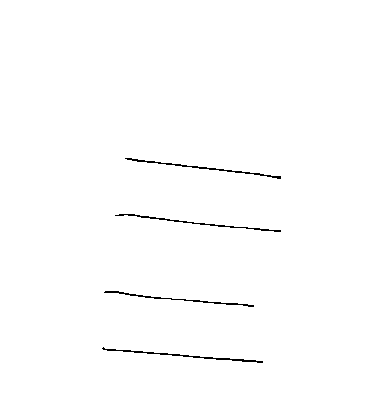

time: 00:00:00
Initialization complete
total time: 00:00:00

Starting block 1 of 4
finding ink frames took 00:00:00
setting pixel values took 00:00:08
writing block to output took 00:00:00
reading in new block took 00:00:00
that fella took 00:00:08
total time: 00:00:09

Starting block 2 of 4
finding ink frames took 00:00:00
setting pixel values took 00:00:08
writing block to output took 00:00:00
reading in new block took 00:00:00
that cheeky loop took 00:00:08
total time: 00:00:18

Starting block 3 of 4
finding ink frames took 00:00:00
setting pixel values took 00:00:08
writing block to output took 00:00:00
reading in new block took 00:00:00
that big guy took 00:00:08
total time: 00:00:27

Starting block 4 of 4
finding ink frames took 00:00:00
setting pixel values took 00:00:08
writing block to output took 00:00:00
reading in new block took 00:00:00
Finishing up the leftovers
len(frame_buffer): 50
total time: 00:00:44
Complete


In [ ]:
### Packages

import cv2
import os.path
import time
import random
import numpy as np
from tqdm import tqdm
from google.colab.patches import cv2_imshow

################################################################################

### Settings

# run with extra testing for analysis?
verbose = True

if verbose:
  t0 = time.time()

input_filename = "drive/My Drive/Colab Notebooks/draw2.mov"

output_filename = "drive/My Drive/Colab Notebooks/test3.avi"
# check if output filename exists
assert not os.path.isfile(output_filename), "output filename already exists"


# define thresholds for the transformation

# how many frames a pixel has to settle down to be considered inked
frame_threshold = 50
# the threshold for black-and-white-ing pixels
bw_threshold = 100


################################################################################

### Auxiliary Functions

# check if a pixel is ``black''
# takes list of 3 uint8
def is_black(pixel, threshold):
  # convert to int so that the sum works properly (no wrap-around)
  if int(pixel[0])+int(pixel[1])+int(pixel[2]) < 3*threshold:
    return True
  return False

# read in a block of frames from a VideoCapture
# size = number of frames
def read_block(videocap, size):
  block = []
  check, frame = videocap.read()
  count = 1
  while check == True:
    block.append(frame)
    if count < size:
      check, frame = videocap.read()
      count += 1
    else:
      break
  return block

# find the frame on which a certain pixel gets inked
# returns the index of the frame in the buffer, or None if no ink frame found
def find_ink_frame(buffer, i, j, frame_threshold, bw_threshold):
  # x works forwards
  # y works backwards
  # start from the middle
  x = frame_threshold - 1
  y = 0
  while x < len(buffer):
    # step back until we find a white pixel or the beginning of the buffer
    while is_black(buffer[x-y][i][j], bw_threshold) and x-y >= 0:
      y += 1
    # once we find a white pixel
    # if we've found a long enough run, return
    if y >= frame_threshold:
      return x-y+1 # +1 because the current pixel is white
    # if not, skip forward to the next possible end of a long enough run
    else:
      x = x-y + frame_threshold
      y = 0
  # at this point we've reached the end of the buffer without finding a long enough run
  return None


# change pixels to black and white
# edits the frame in place
# takes a frame, an array of ink frames, the height and width of the frame, and the frame number (or position)
def process_frame(frame, ink, h, w, pos):
  for i in range(h):
    for j in range(w):
      # if the ink frame hasn't been inked yet, make it white
      if ink[i][j] == None or ink[i][j] > pos:
        frame[i][j] = [255,255,255]
      # otherwise it has, make it black
      else:
        frame[i][j] = [0,0,0]

################################################################################

### Initialize video files

# open VideoCapture for input
cap = cv2.VideoCapture(input_filename)
print("did VideoCapture work? " + str(cap.isOpened()))

# record specs from input video
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(str(width)+'x'+str(height)+' pixels, '+str(round(fps,1))+' fps, '+str(frame_count)+' total frames')

# open VideoWriter for output
out = cv2.VideoWriter(output_filename,
                      cv2.VideoWriter_fourcc(*'MJPG'),
                      fps,
                      (width, height))

################################################################################

### Process the final frame as reference

# set frame position to frame_count - 1, should be the final frame
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_count - 1)
check, final_frame = cap.read()
# error out if it didn't read correctly
assert check == True, "Failed to read final frame"

# set frame position back to 0
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

# convert final frame to black and white
for i in range(height):
  for j in range(width):
    if is_black(final_frame[i][j], bw_threshold):
      final_frame[i][j] = [0,0,0]
    else:
      final_frame[i][j] = [255,255,255]

# show black and white final frame
if verbose:
  cv2_imshow(final_frame)

# make a list of pixels to check for ink frame
uninked = []
for i in range(height):
  for j in range(width):
    if is_black(final_frame[i][j], bw_threshold):
      uninked.append([i,j])

ink_frame = [[None for j in range(width)] for i in range(height)]

################################################################################

### Initialize frame buffer

# ignore the case where we don't have at least 2 blocks
assert frame_count > 2*frame_threshold, "video too short"

# start by reading in two blocks
frame_buffer = read_block(cap, frame_threshold)
frame_buffer += read_block(cap, frame_threshold)

if verbose:
  t1 = time.time()
  print("time: "+time.strftime("%H:%M:%S", time.gmtime(t1-t0))+"\nInitialization complete")

################################################################################

### Main processing loop

for block_number in range(frame_count//frame_threshold - 1):

  if verbose:
    t2 = time.time()
    if block_number > 0:
      last = random.choice(["ol' boy", "fella", "big guy", "little lady", "kiddo", "cheeky loop", "nasty one", "sneaky snoop"])
      print("that "+last+" took "+time.strftime("%H:%M:%S", time.gmtime(t2-t1)))
    print("total time: "+time.strftime("%H:%M:%S", time.gmtime(t2-t0)))
    print("\nStarting block "+str(block_number+1)+" of "+str(frame_count//frame_threshold - 1))
    t1 = time.time()

  # search for new ink frames
  new_inked = []
  for [i,j] in uninked:
    f = find_ink_frame(frame_buffer, i, j, frame_threshold, bw_threshold)
    if f != None:
      ink_frame[i][j] = block_number*frame_threshold + f
      new_inked.append([i,j])
  # remove pixels we just inked from uninked list
  for [i,j] in new_inked:
    uninked.remove([i,j])
  
  if verbose:
    t3 = time.time()
    print("finding ink frames took "+time.strftime("%H:%M:%S", time.gmtime(t3-t1)))
  
  # set pixel values in earlier block
  for f in range(frame_threshold):
    process_frame(frame_buffer[f], ink_frame, height, width, block_number*frame_threshold + f)

  if verbose:
    t4 = time.time()
    print("setting pixel values took "+time.strftime("%H:%M:%S", time.gmtime(t4-t3)))

  # write earlier block to output
  for f in range(frame_threshold):
    out.write(frame_buffer[f])
  
  if verbose:
    t5 = time.time()
    print("writing block to output took "+time.strftime("%H:%M:%S", time.gmtime(t5-t4)))

  # delete earlier block and read in new block
  frame_buffer = frame_buffer[frame_threshold:]
  frame_buffer += read_block(cap, frame_threshold)
  
  if verbose:
    t6 = time.time()
    print("reading in new block took "+time.strftime("%H:%M:%S", time.gmtime(t6-t5)))

################################################################################

### Final processing when we've run out of blocks

# at this point frame_buffer should contain 1 full block plus the rest of the frames

block_number = frame_count//frame_threshold - 1


if verbose:
  print("Finishing up the leftovers")
  print("len(frame_buffer): "+str(len(frame_buffer)))

# search for new ink frames
new_inked = []
for [i,j] in uninked:
  # step back from the end until we reach a white frame or run out of buffer
  x = len(frame_buffer) - 1
  y = 0
  if not is_black(frame_buffer[x-y][i][j], bw_threshold):
    y = 1
    # shouldn't happen, because uninked list consists of pixels black in final frame
    if verbose:
      print("uninked pixel not black in final frame")
  while x-y >= 0 and is_black(frame_buffer[x-y][i][j], bw_threshold):
    y += 1
  f = x-y+1
  ink_frame[i][j] = block_number*frame_threshold + f
  new_inked.append([i,j])
for [i,j] in new_inked:
  uninked.remove([i,j])

# set the rest of pixel values
for f in range(len(frame_buffer)):
  process_frame(frame_buffer[f], ink_frame, height, width, block_number*frame_threshold + f)



# write everything to output
for f in range(len(frame_buffer)):
  out.write(frame_buffer[f])

# and finally, close everything up
cap.release()
out.release()

if verbose:
  t1 = time.time()
  print("total time: "+time.strftime("%H:%M:%S", time.gmtime(t1-t0))+"\nComplete")


In [ ]:
import time
from multiprocessing import Pool, Array, Lock

# takes a list of numbers
# edits in place, replacing any number greater than 5 by [5]
def foo(a):
  for i in range(len(a)):
    if a[i] > 5:
      time.sleep(1)
      a[i] = "big"
      print("big")

a = [[x + y + 2 for x in range(4)] for y in range(4)]
b = [[x + y + 2 for x in range(4)] for y in range(4)]
print(a)

print("Series:")
for l in a:
  foo(l)
print(a)

print("Parallel:")

lock = Lock()

shared_array = [Array('i', l, lock=lock) for l in b]

with Pool(4) as p:
  p.map(foo)
print(shared_array)

[[2, 3, 4, 5], [3, 4, 5, 6], [4, 5, 6, 7], [5, 6, 7, 8]]
Series:
big
big
big
big
big
big
[[2, 3, 4, 5], [3, 4, 5, 'big'], [4, 5, 'big', 'big'], [5, 'big', 'big', 'big']]
Parallel:


RuntimeError: ignored

## NumPy Version

Thanks to AMC for pushing numpy.where!

Oh my hecking geezness (!) :
* 00:01 for 392x402 px 250 frames
* 01:52 for 1921x1080 px 2555 frames

freaking BIG: ~80x speedup

Possible improvements:

* Adjust `find_ink_frame`
 * for example, choose key frames along the way in place of only using the final frame, so that we only have to avoid small areas at a time? 
 * Or is it possible to automatically detect key frames?
 * Allow for small movements of the camera/page by checking if nearby pixels have been inked? (But of course do it in such a way that it doesn't propogate)

did VideoCapture work? True
1920x1080 pixels, 30.0 fps, 2899 total frames


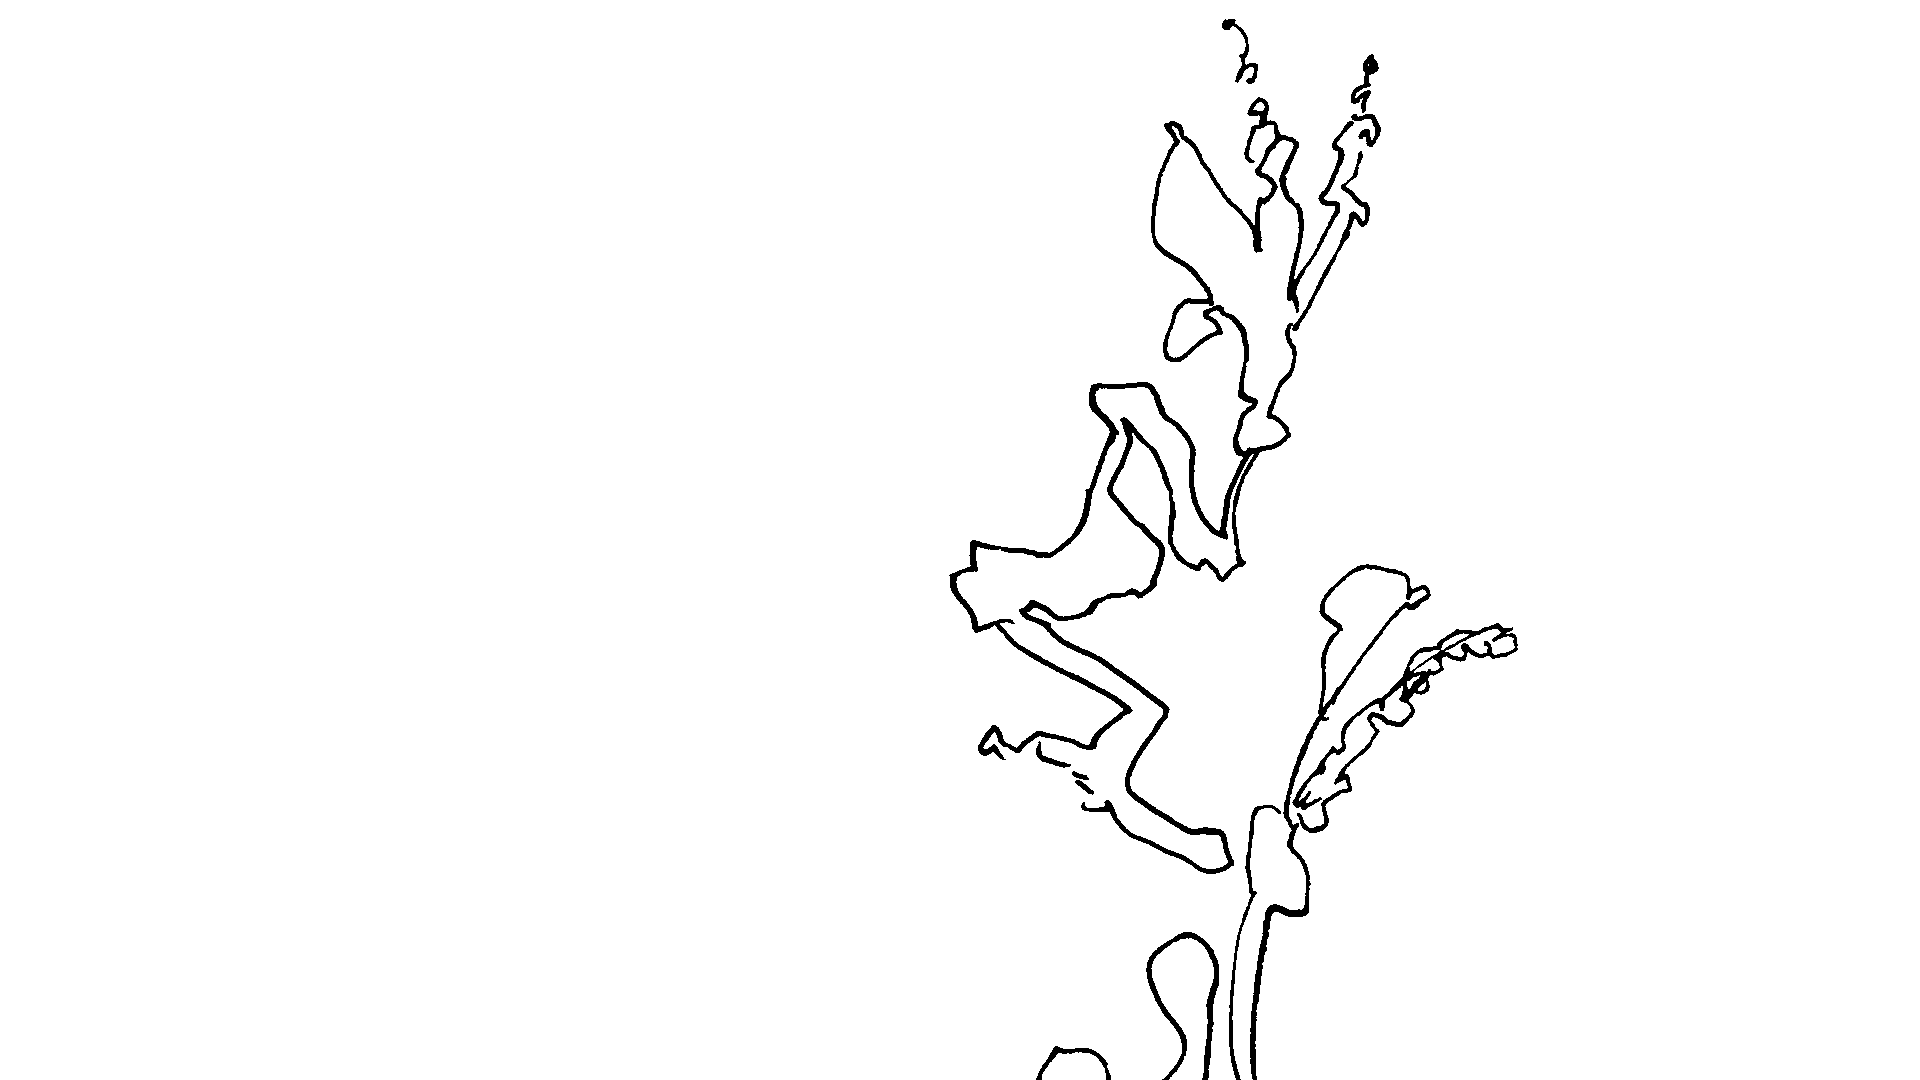

time: 00:00:05
Initialization complete


100%|██████████| 25/25 [02:36<00:00,  6.26s/it]


Finishing up the leftovers
len(frame_buffer): 149
total time: 00:02:48
Complete


In [ ]:
### Packages

import cv2
import os.path
import time
import random
import numpy as np
from tqdm import tqdm
from google.colab.patches import cv2_imshow

################################################################################

### Settings

# run with extra testing for analysis?
verbose = True

input_filename = "drive/My Drive/Colab Notebooks/draw4.mov"

output_filename = "drive/My Drive/Colab Notebooks/drawing.avi"
# check if output filename exists
assert not os.path.isfile(output_filename), "output filename already exists"


# define thresholds for the transformation

# how many frames a pixel has to settle down to be considered inked
frame_threshold = 110
# the threshold for black-and-white-ing pixels
bw_threshold = 120

# skip any frames in which no pixels change
only_show_ink_frames = False
# additional copies of final frame at the end
outro = 3*30

################################################################################

### Auxiliary Functions

# check if a pixel is ``black''
# takes uint8
def is_black(pixel, threshold):
  # convert to int so that it works properly (who knows?)
  return int(pixel) < threshold

# read in a block of frames from a VideoCapture
# size = number of frames
def read_block(videocap, size):
  block = []
  check, frame = videocap.read()
  count = 1
  while check == True:
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    block.append(frame)
    if count < size:
      check, frame = videocap.read()
      count += 1
    else:
      break
  return np.asarray(block, dtype=np.uint8)

# find the frame on which a certain pixel gets inked
# returns the index of the frame in the buffer, or None if no ink frame found
def find_ink_frame(buffer, i, j, frame_threshold, bw_threshold):
  # x works forwards
  # y works backwards
  # start from the middle
  x = frame_threshold - 1
  y = 0
  while x < len(buffer):
    # step back until we find a white pixel or the beginning of the buffer
    while is_black(buffer[x-y][i][j], bw_threshold) and x-y >= 0:
      y += 1
    # once we find a white pixel
    # if we've found a long enough run, return
    if y >= frame_threshold:
      return x-y+1 # +1 because the current pixel is white
    # if not, skip forward to the next possible end of a long enough run
    else:
      x = x-y + frame_threshold
      y = 0
  # at this point we've reached the end of the buffer without finding a long enough run
  return None

# return frame of black and white pixels according to whether they've been inked yet
def process_frame(ink, pos):
  # condition ink>pos means ink frame not reached yet (or no ink frame found yet)
  # in that case color white, otherwise black
  return np.where((ink>pos), 255,0)

################################################################################

### Initialize video files

if verbose:
  t0 = time.time()

# open VideoCapture for input
cap = cv2.VideoCapture(input_filename)
print("did VideoCapture work? " + str(cap.isOpened()))

# record specs from input video
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(str(width)+'x'+str(height)+' pixels, '+str(round(fps,1))+' fps, '+str(frame_count)+' total frames')

# open VideoWriter for output
out = cv2.VideoWriter(output_filename,
                      cv2.VideoWriter_fourcc(*'MJPG'),
                      fps,
                      (width, height),
                      isColor=False)

################################################################################

### Process the final frame as reference

# set frame position to frame_count - 1, should be the final frame
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_count - 1)
check, final_frame = cap.read()
# error out if it didn't read correctly
assert check == True, "Failed to read final frame"

# set frame position back to 0
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

# convert final frame to grayscale
final_frame = cv2.cvtColor(final_frame, cv2.COLOR_BGR2GRAY)
# then to numpy array
final_frame = np.asarray(final_frame, dtype=np.uint8)
# then to black and white
final_frame = np.where(final_frame < bw_threshold, 0, 255)

# show black and white final frame
if verbose:
  cv2_imshow(final_frame)

# make a list of pixels to check for ink frame
uninked = []
for i in range(height):
  for j in range(width):
    if is_black(final_frame[i][j], bw_threshold):
      uninked.append([i,j])

ink_frame = np.full((height, width), frame_count)

################################################################################

### Initialize frame buffer

# ignore the case where we don't have at least 2 blocks
assert frame_count > 2*frame_threshold, "video too short"

# start by reading in two blocks
frame_buffer = read_block(cap, frame_threshold)
frame_buffer = np.concatenate((frame_buffer, read_block(cap, frame_threshold)))

if verbose:
  t1 = time.time()
  print("time: "+time.strftime("%H:%M:%S", time.gmtime(t1-t0))+"\nInitialization complete")

################################################################################

### Main processing loop


###
##
#   DEMO CODE
#   set up some arrays to make masks from

diagonals = np.array([[i/height+j/width for j in range(width)] for i in range(height)])
delay = 500 # number of frames to delay before mask starts scanning, encoded in rows array
rows = np.array([[i + delay for j in range(width)] for i in range(height)])

#
##
###


for block_number in tqdm(range(frame_count//frame_threshold - 1)):

  # search for new ink frames
  new_inked_pixels = [] # records pixels to remove from uninked
  new_inked_frames = [] # records frames that contain a pixel being inked
  for [i,j] in uninked:
    f = find_ink_frame(frame_buffer, i, j, frame_threshold, bw_threshold)
    if f != None:
      ink_frame[i][j] = block_number*frame_threshold + f
      new_inked_pixels.append([i,j])
      new_inked_frames.append(f)
  # remove pixels we just inked from uninked list
  for [i,j] in new_inked_pixels:
    uninked.remove([i,j])

  # set pixel values in earlier block
  for f in range(frame_threshold):
    # NON-DEMO CODE frame_buffer[f] = process_frame(ink_frame, block_number*frame_threshold + f)

    ###
    ##
    #   DEMO CODE
    #   apply a mask to the frame to create effects

    true_frame = block_number*frame_threshold + f
    mask = np.where(np.logical_and(diagonals >= 1 - 1/width, rows < true_frame), 1, 0)
    temp = process_frame(ink_frame, block_number*frame_threshold + f)
    frame_buffer[f] = np.where(mask, temp, frame_buffer[f])

    #
    ##
    ###

  # write earlier block to output
  for f in range(frame_threshold):
    if only_show_ink_frames and f not in new_inked_frames:
      pass
    else:
      out.write(frame_buffer[f])
  
  # delete earlier block and read in new block
  frame_buffer = frame_buffer[frame_threshold:]
  try:
    frame_buffer = np.concatenate((frame_buffer, read_block(cap, frame_threshold)))
  except ValueError:
    pass # if the block size exactly divides the frame count then the last block will be empty

################################################################################

### Final processing when we've run out of blocks

# at this point frame_buffer should contain 1 full block plus the rest of the frames

block_number = frame_count//frame_threshold - 1

if verbose:
  print("Finishing up the leftovers")
  print("len(frame_buffer): "+str(len(frame_buffer)))

# search for new ink frames
new_inked_pixels = []
new_inked_frames = []
for [i,j] in uninked:
  # step back from the end until we reach a white frame or run out of buffer
  x = len(frame_buffer) - 1
  y = 0
  if not is_black(frame_buffer[x-y][i][j], bw_threshold):
    y = 1
    # shouldn't happen, because uninked list consists of pixels black in final frame
    if verbose:
      print("uninked pixel not black in final frame")
  while x-y >= 0 and is_black(frame_buffer[x-y][i][j], bw_threshold):
    y += 1
  f = x-y+1
  ink_frame[i][j] = block_number*frame_threshold + f
  new_inked_pixels.append([i,j])
  new_inked_frames.append(f)
for [i,j] in new_inked_pixels:
  uninked.remove([i,j])

# set the rest of pixel values
for f in range(len(frame_buffer)):
  # NON-DEMO CODE frame_buffer[f] = process_frame(ink_frame, block_number*frame_threshold + f)
  
  ###
  ##
  #   DEMO CODE
  #   apply a mask to the frame to create effects

  true_frame = block_number*frame_threshold + f
  mask = np.where(np.logical_and(diagonals >= 1 - 1/width, rows < true_frame), 1, 0)
  temp = process_frame(ink_frame, block_number*frame_threshold + f)
  frame_buffer[f] = np.where(mask, temp, frame_buffer[f])

  #
  ##
  ###

# write everything to output
for f in range(len(frame_buffer)):
  if only_show_ink_frames and f not in new_inked_frames:
    pass
  else:
    out.write(frame_buffer[f])

if only_show_ink_frames:
  for _ in range(outro):
    out.write(frame_buffer[-1])

# and finally, close everything up
cap.release()
out.release()

if verbose:
  t1 = time.time()
  print("total time: "+time.strftime("%H:%M:%S", time.gmtime(t1-t0))+"\nComplete")


In [ ]:
import numpy as np
h = 5
w = 10
first = np.array([[i/h+j/w for j in range(w)] for i in range(h)])
second = np.where(first>=1-1/w, 1, 0)
print(first)
print(second)
np.array([[i for j in range(5)] for i in range(3)])

[[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1]
 [0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3]
 [0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5]
 [0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7]]
[[0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1]]


array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2]])

## Multiprocessing

In [ ]:
import cv2
import os.path
import time
import random
import numpy as np
from google.colab.patches import cv2_imshow
import multiprocessing

# run with extra testing for analysis?
verbose = True

filename = 'drive/My Drive/Colab Notebooks/draw2.mov'

output_filename = "parallel_test_output.avi"

# define thresholds for the transformation

# how many frames a pixel has to settle down to be allowed to change
frame_threshold = 50
# the amount of fluctuation that still counts as "settled down"
change_threshold = 200
# the minimum difference significant enough to show
difference_threshold = 0
# the threshold for black-and-white-ing pixels
bw_threshold = 160


# test grid
# 3/15 30 50/
# 5/25 40 60/
# 10/50 70 100/
# 20/90 120 160/
# 40/200 235 280/

################################################################################

#
# function definitions
#

# function to turn a list of frames into a list of "pixels", 
#   i.e. each element of the output list is a list of pixel values
#   for a fixed pixel as the frame varies
# takes a 4-dimensional list
#   num_frames x height x width x channels
# returns (height, width, list of pixels)
def frames_to_pixels(frames):
  assert np.ndim(frames) == 4, "list of frames must be 4-dimensional"
  (num_frames, height, width, _) = np.shape(frames)
  coords = [[x, y] for x in range(height) for y in range(width)]
  pixels = [[frames[f][coord[0]][coord[1]] for f in range(num_frames)] for coord in coords]
  return (height, width, pixels)

# the reverse operation of frames_to_pixels, takes height, width, and
#   list of pixels and turns it into a list of frames with specified height and width
def pixels_to_frames(height, width, pixels):
  (total_pixels, num_frames, _) = np.shape(pixels)
  assert height * width == total_pixels, "total number of pixels must equal height * width"
  frames = [[[pixels[y + (width * x)][f] for y in range(width)] for x in range(height)] for f in range(num_frames)]
  return frames

# auxiliary function to compute the absolute difference between two lists (of uint8)
def abs_diff(x, y):
  assert len(x) == len(y)
  return sum(abs(int(x[i])-int(y[i])) for i in len(x))

# processing of a single pixel, a list of shape num_frames x channels
def process_pixel(pixel):

  # for initial tests, let's not worry about anything
  return pixel

  # adjust levels
  for f in len(pixel):
    for l in [0, 1, 2]:
      if pixel[f][l] > bw_threshold:
        pixel[f][l] = 255
      else:
        pixel[f][l] = 0
      # lil extra sumpin
      avg = int(sum(int(pixel[f][l]) for l in [0, 1, 2]) / 3)
      pixel[f] = [avg, avg, avg]

  # compute differences between frames and changes over a period of frames
  differences = [abs_diff(pixel(f), pixel(f+1)) for f in range(len(pixel)-1)]
  changes = [sum(differences[f:f+frame_threshold]) for f in range(len(pixel)-frame_threshold)]

  # perform processing
  for f in len(1, len(changes)):
    if changes[f] >= change_threshold:
      pixel[f] = pixel[f-1]


  # discard last frame_threshold frames that we didn't process
  return pixel[:len(changes)]

################################################################################

#
# Run time
#

t0 = time.time()

# input video
cap = cv2.VideoCapture(filename)
print("did VideoCapture work? " + str(cap.isOpened()))

# record specs from input video
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(str(width)+'x'+str(height)+' pixels, '+str(round(fps,1))+' fps, '+str(frame_count)+' total frames')

# check if output filename exists
if os.path.isfile(output_filename):
  raise ValueError("output filename already exists")

# output video
out = cv2.VideoWriter(output_filename,
                      cv2.VideoWriter_fourcc(*'MJPG'),
                      fps,
                      (width, height))

# read the video into a massive array
frames = []
check, frame = cap.read()
counter = 1
while check == True:
  frames.append(frame)
  check, frame = cap.read()
  counter += 1
  if counter % 100 == 0:
    print("reading frame "+str(counter))

t1 = time.time()
print("initialization complete\ntime: "+time.strftime("%H:%M:%S", time.gmtime(t1-t0)))

#
# initialization complete
#



pixels = frames_to_pixels(frames)
t2 = time.time()
print("conversion to pixels complete\ntime: "+time.strftime("%H:%M:%S", time.gmtime(t2-t0)))

pixels = multiprocessing.Pool(20).map(process_pixel, pixels)
pixels = list(map(process_pixel, pixels))
t3 = time.time()
print("processing of pixels complete\ntime: "+time.strftime("%H:%M:%S", time.gmtime(t3-t0)))

frames = pixels_to_frames(height, width, pixels)
t4 = time.time()
print("conversion to frames complete\ntime: "+time.strftime("%H:%M:%S", time.gmtime(t4-t0)))

for frame in frames:
  out.write(frame)

cap.release()
out.release()

t5 = time.time()

print("writing output completed\ntime: "+time.strftime("%H:%M:%S", time.gmtime(t5-t0)))

## Old Disorganized Code

In [ ]:
import cv2
import os.path
import time
import random
import numpy as np
from google.colab.patches import cv2_imshow
import multiprocessing

# run with extra testing for analysis?
verbose = True

filename = 'drive/My Drive/Colab Notebooks/draw2.mov'

output_filename = "parallel_test_output.avi"

# define thresholds for the transformation

# how many frames a pixel has to settle down to be allowed to change
frame_threshold = 50
# the amount of fluctuation that still counts as "settled down"
change_threshold = 200
# the minimum difference significant enough to show
difference_threshold = 0
# the threshold for black-and-white-ing pixels
bw_threshold = 160


# test grid
# 3/15 30 50/
# 5/25 40 60/
# 10/50 70 100/
# 20/90 120 160/
# 40/200 235 280/

################################################################################

# function to turn a list of frames into a list of "pixels", 
#   i.e. each element of the output list is a list of pixel values
#   for a fixed pixel as the frame varies
# takes a 4-dimensional list
#   num_frames x height x width x channels
# returns (height, width, list of pixels)
def frames_to_pixels(frames):
  assert np.ndim(frames) == 4, "list of frames must be 4-dimensional"
  (num_frames, height, width, _) = np.shape(frames)
  coords = [[x, y] for x in range(height) for y in range(width)]
  pixels = [[frames[f][coord[0]][coord[1]] for f in range(num_frames)] for coord in coords]
  return (height, width, pixels)

# the reverse operation of frames_to_pixels, takes height, width, and
#   list of pixels and turns it into a list of frames with specified height and width
def pixels_to_frames(height, width, pixels):
  (total_pixels, num_frames, _) = np.shape(pixels)
  assert height * width == total_pixels, "total number of pixels must equal height * width"
  frames = [[[pixels[y + (width * x)][f] for y in range(width)] for x in range(height)] for f in range(num_frames)]
  return frames

# auxiliary function to compute the absolute difference between two lists (of uint8)
def abs_diff(x, y):
  assert len(x) == len(y)
  return sum(abs(int(x[i])-int(y[i])) for i in len(x))

# processing of a single pixel, a list of shape num_frames x channels
def process_pixel(pixel):

  # for initial tests, let's not worry about anything
  return pixel

  # adjust levels
  for f in len(pixel):
    for l in [0, 1, 2]:
      if pixel[f][l] > bw_threshold:
        pixel[f][l] = 255
      else:
        pixel[f][l] = 0
      # lil extra sumpin
      avg = int(sum(int(pixel[f][l]) for l in [0, 1, 2]) / 3)
      pixel[f] = [avg, avg, avg]

  # compute differences between frames and changes over a period of frames
  differences = [abs_diff(pixel(f), pixel(f+1)) for f in range(len(pixel)-1)]
  changes = [sum(differences[f:f+frame_threshold]) for f in range(len(pixel)-frame_threshold)]

  # perform processing
  for f in len(1, len(changes)):
    if changes[f] >= change_threshold:
      pixel[f] = pixel[f-1]


  # discard last frame_threshold frames that we didn't process
  return pixel[:len(changes)]

################################################################################

t0 = time.time()

# input video
cap = cv2.VideoCapture(filename)
print("did VideoCapture work? " + str(cap.isOpened()))

# record specs from input video
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(str(width)+'x'+str(height)+' pixels, '+str(round(fps,1))+' fps, '+str(frame_count)+' total frames')

# check if output filename exists
if os.path.isfile(output_filename):
  raise ValueError("output filename already exists")

# output video
out = cv2.VideoWriter(output_filename,
                      cv2.VideoWriter_fourcc(*'MJPG'),
                      fps,
                      (width, height))

# read the video into a massive array
frames = []
check, frame = cap.read()
counter = 1
while check == True:
  frames.append(frame)
  check, frame = cap.read()
  counter += 1
  if counter % 100 == 0:
    print("reading frame "+str(counter))

t1 = time.time()
print("initialization complete\ntime: "+time.strftime("%H:%M:%S", time.gmtime(t1-t0)))

#
# initialization complete
#



pixels = frames_to_pixels(frames)
t2 = time.time()
print("conversion to pixels complete\ntime: "+time.strftime("%H:%M:%S", time.gmtime(t2-t0)))

pixels = multiprocessing.Pool(20).map(process_pixel, pixels)
pixels = list(map(process_pixel, pixels))
t3 = time.time()
print("processing of pixels complete\ntime: "+time.strftime("%H:%M:%S", time.gmtime(t3-t0)))

frames = pixels_to_frames(height, width, pixels)
t4 = time.time()
print("conversion to frames complete\ntime: "+time.strftime("%H:%M:%S", time.gmtime(t4-t0)))

for frame in frames:
  out.write(frame)

cap.release()
out.release()

t5 = time.time()

print("writing output completed\ntime: "+time.strftime("%H:%M:%S", time.gmtime(t5-t0)))







assert False, "this is to comment out the rest of the cell"

# tests
if verbose:
  complete_changes = []
  complete_differences = []

# for each pixel
for i in range(height):
  # time check
  if i == 0:
    t0 = time.time()
  elif i % 50 == 0 or i == 10:
    print("starting row "+str(i))
    t1 = time.time()
    # estimate the time remaining by number of rows remaining times avg time per row so far
    est = (height - i)*(t1 - t0)/i
    print("estimated time remaining: "+time.strftime("%H:%M:%S", time.gmtime(est))+"\t(elapsed time: "+time.strftime("%H:%M:%S", time.gmtime(t1-t0))+")")
  for j in range(width):
    
    # more tests
    if verbose and i + j == 0:
      print("frames: \n"+str(frames[0][i][j])+"\n"+str(frames[1][i][j]))
      print("channels: \n"+str([frames[0][i][j][l] for l in [0, 1, 2]])+"\n"+str([frames[1][i][j][l] for l in [0, 1, 2]]))
      print("int channels: \n"+str([int(frames[0][i][j][l]) for l in [0, 1, 2]])+"\n"+str([int(frames[1][i][j][l]) for l in [0, 1, 2]]))
      print("int signed diff: "+str([int(frames[0][i][j][l])-int(frames[1][i][j][l]) for l in [0, 1, 2]]))
      print("signed diff: "+str([frames[0][i][j][l] - frames[1][i][j][l] for l in [0, 1, 2]]))
      print("indiv diff: "+str([abs(frames[0][i][j][l] - frames[1][i][j][l]) for l in [0, 1, 2]]))
      print("sum of diff: "+str(sum(abs(frames[0][i][j][l] - frames[1][i][j][l]) for l in [0, 1, 2])))

    
    # adjust curves
    for f in range(len(frames)):
      for l in [0, 1, 2]:
        if frames[f][i][j][l] > bw_threshold:
          frames[f][i][j][l] = 255
        else:
          frames[f][i][j][l] = 0

    # compute a list of differences
    # differences[x] is the total absolute difference of pixel channels
    #   between our pixel in frame x and frame x+1
    # should have len(differences) = len(frames) - 1
    # note pixel values are coming in as uint8 data type, so need to convert
    #   to int to do useful arithmetic (i.e. prevent wrap-around for negatives)
    differences = [sum(abs(int(frames[f][i][j][l]) - int(frames[f+1][i][j][l])) for l in [0, 1, 2]) for f in range(len(frames)-1)]

    # more tests
    if verbose and i + j == 0:
      print("vs differences: "+str(differences[0]))

    # compute a list of changes over each frame_threshold
    # changes[x] is the threshold comparison for our pixel in frame x
    # should have len(changes) = len(frames) - frame_threshold
    changes = [sum(differences[f+x] for x in range(frame_threshold)) for f in range(len(frames)-frame_threshold)]

    # more tests
    if verbose:
      complete_differences += differences
      complete_changes += changes
    if verbose and i + j == 0:
      print(differences)
      print(changes)
      for f in range(10):
        print(frames[f][i][j])

    # for each frame, starting with the second, as long as we have enough of a buffer
    for f in range(1, len(changes)):
      # if the pixel looks like it's changing, don't let it
      # or if it hasn't changed enough to be an ink line
      diff = sum(abs(int(frames[f-1][i][j][l])-int(frames[f][i][j][l])) for l in [0, 1, 2])
      if changes[f] >= change_threshold or diff < difference_threshold:
        # set the pixel to the previous frame
        frames[f][i][j] = frames[f-1][i][j]
      # otherwise, let it change

# processing of frames is complete    


if verbose:
  print("frame threshold: "+str(frame_threshold))
  print("average difference: "+str(sum(complete_differences)/len(complete_differences))+"\nmaximum difference: "+str(max(complete_differences)))
  print("average change: "+str(sum(complete_changes)/len(complete_changes))+"\nmaximum change: "+str(max(complete_changes)))
  from matplotlib import pyplot as plt
  print("histogram of differences:")
  plt.hist(complete_differences)
  plt.show()
  print("histogram of changes:")
  plt.hist(complete_changes)
  plt.show()
  cv2_imshow(frames[frame_count // 3])
  cv2_imshow(frames[2 * frame_count // 3])



# write our frames to a video file
for frame in frames:
  out.write(frame)

# and finally, close everything up
cap.release()
out.release()

did VideoCapture work? True
392x402 pixels, 30.0 fps, 250 total frames
reading frame 100
reading frame 200
initialization complete
time: 00:00:00
conversion to pixels complete
time: 00:00:19


In [ ]:
!cp "FT50_CT200_BW160_output.avi" "drive/My Drive/Colab Notebooks"

In [ ]:
import time
import multiprocessing
from functools import reduce

def slow_fn(x):
  time.sleep(3)
  return x*x

L = range(5)

# task: reduce(sum, map(slow_fn, L))

t0 = time.time()

# series benchmark
L1 = list(map(slow_fn, L))
t1 = time.time()
print(str(L1)+"\ntime: "+time.strftime("%M:%S", time.gmtime(t1-t0)))

# with multiproccessing.Pool
pool = multiprocessing.Pool()
L2 = pool.map(slow_fn, L)
t2 = time.time()
print(str(L2)+"\ntime: "+time.strftime("%M:%S", time.gmtime(t2-t1)))


[0, 1, 4, 9, 16]
time: 00:15
[0, 1, 4, 9, 16]
time: 00:09


In [ ]:
import multiprocessing
import time

external = [0, 1, 2, 3]

def slow_square(x):
  time.sleep(1)
  return x*x

def fn(l):
  p = multiprocessing.Pool(5)
  return p.map(slow_square, l)

def fn2(l):
  p = multiprocessing.Pool()
  return list(map(fn, l))

x = [[y+z for y in range(5)] for z in range(5)]

t0 = time.time()

print(fn2(x))

t1 = time.time()
print("time: "+time.strftime("%M:%S", time.gmtime(t1-t0)))

print(fn(range(5)))

[[0, 1, 4, 9, 16], [1, 4, 9, 16, 25], [4, 9, 16, 25, 36], [9, 16, 25, 36, 49], [16, 25, 36, 49, 64]]
time: 00:05
[0, 1, 4, 9, 16]


In [ ]:
assert True, "string"
assert False, "String"
print("STRING")

AssertionError: ignored

In [ ]:
assert np.shape([[[3],[2],[1]],[[3],[2],[1]]]) == (2, _, 1)
print("ok")

AssertionError: ignored